In [55]:
! pip3 install 'ocrd-fork-pylsd == 0.0.3'

In [56]:
import requests

url = "https://www.photock.jp/photo/middle/photo0000-0732.jpg"
url = "https://i.ytimg.com/vi/yB__k1PAqyY/maxresdefault.jpg"
url = "https://i.ytimg.com/vi/z4I0DynGnCw/maxresdefault.jpg"

file_name = "sample.jpg"
response = requests.get(url)
image = response.content
with open(file_name, "wb") as aaa:
        aaa.write(image)

In [57]:
import cv2
import time
from pylsd.lsd import lsd

import numpy as np

img = cv2.imread('sample.jpg')
img = cv2.resize(img,(int(img.shape[1]/5),int(img.shape[0]/5)))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),5)

t1 = time.time()
edges = cv2.Canny(gray,50,150,apertureSize = 3)
linesH = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=50, minLineLength=50, maxLineGap=10)
t2 = time.time()

linesL = lsd(gray)
t3 = time.time()

img2 = img.copy()
for line in linesH:
    x1, y1, x2, y2 = line[0]

    # 赤線を引く
    img2 = cv2.line(img2, (x1,y1), (x2,y2), (0,0,255), 3)

cv2.imwrite('samp_hagh.jpg',img2)
img3 = img.copy()
img4 = img.copy()
for line in linesL:
    x1, y1, x2, y2 = map(int,line[:4])
    img3 = cv2.line(img3, (x1,y1), (x2,y2), (0,0,255), 3)
    if (x2-x1)**2 + (y2-y1)**2 > 1000:
       # 赤線を引く
       img4 = cv2.line(img4, (x1,y1), (x2,y2), (0,0,255), 3)
print("Hagh")
print(len(linesH),"lines")
print(t2-t1,"sec")
print("time per a line :{:.4f}".format((t2-t1)/len(linesH)))
print("LSD")
print(len(linesL),"lines")
print(t3-t2,"sec")
print("time per a line {:.4f}".format((t3-t2)/len(linesL)))
cv2.imwrite('samp_pylsd.jpg',img3)
cv2.imwrite('samp_pylsd2.jpg',img4)

Hagh
19 lines
0.005825519561767578 sec
time per a line :0.0003
LSD
80 lines
0.023965120315551758 sec
time per a line 0.0003


True

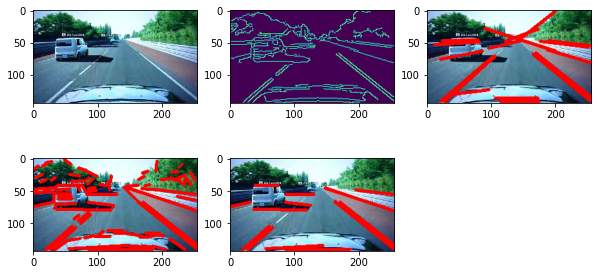

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,2)
plt.imshow(edges)
plt.subplot(2,3,3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,4)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,5)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

In [59]:
def processing_lsd(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(5,5),5)
    
    edges = cv2.Canny(gray,50,150,apertureSize = 3)
    linesH = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=50, minLineLength=50, maxLineGap=10)

    linesL = lsd(gray)

    img2 = img.copy()
    for line in linesH:
        x1, y1, x2, y2 = line[0]

        # 赤線を引く
        img2 = cv2.line(img2, (x1,y1), (x2,y2), (0,0,255), 3)
    
    img3 = img.copy()
    img4 = img.copy()
    for line in linesL:
        x1, y1, x2, y2 = map(int,line[:4])
        img3 = cv2.line(img3, (x1,y1), (x2,y2), (0,0,255), 3)
        if (x2-x1)**2 + (y2-y1)**2 > 1000:
           # 赤線を引く
           img4 = cv2.line(img4, (x1,y1), (x2,y2), (0,0,255), 3)

    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(2,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.subplot(2,2,3)
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    plt.subplot(2,2,4)
    plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

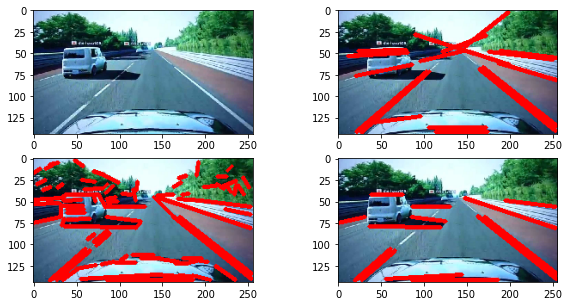

In [60]:
processing_lsd(img)

In [61]:
# pts1 = np.float32([[225, 140],[150, 50],[135, 50],[0, 140]]) # img1
pts1 = np.float32([[255, 140],[190, 80],[70, 80],[0, 140]]) # img2
pts2 = np.float32([[100,100],[100,0],[0,0],[0,100]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(100,100))

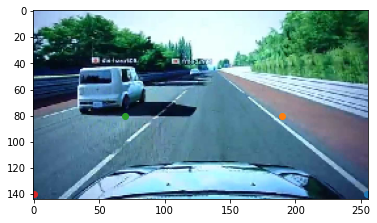

In [62]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for i in range(4):
    plt.scatter(pts1[i][0],pts1[i][1])

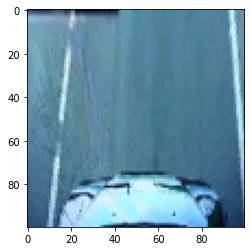

In [63]:
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

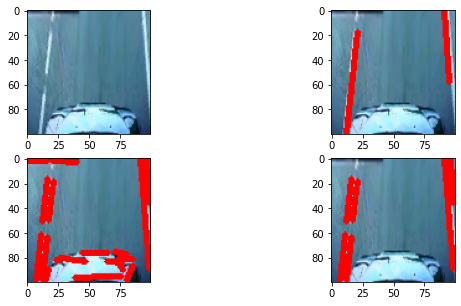

In [64]:
processing_lsd(dst)

In [65]:
# HSVでの色抽出
hsvLower = np.array([0, 50, 100])    # 抽出する色の下限(HSV)
hsvUpper = np.array([100, 100, 255])    # 抽出する色の上限(HSV)
hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV) # 画像をHSVに変換
hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper)    # HSVからマスクを作成
result = cv2.bitwise_and(dst, dst, mask=hsv_mask) # 元画像とマスクを合成

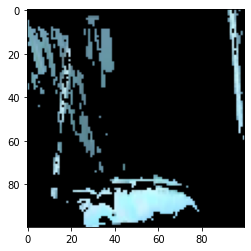

In [66]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [67]:
# BGRでの色抽出
bgrLower = np.array([155, 155, 155])    # 抽出する色の下限(BGR)
bgrUpper = np.array([255, 255, 255])    # 抽出する色の上限(BGR)
img_mask = cv2.inRange(dst, bgrLower, bgrUpper) # BGRからマスクを作成
result = cv2.bitwise_and(dst, dst, mask=img_mask) # 元画像とマスクを合成

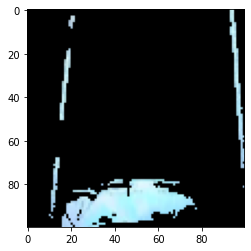

In [68]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

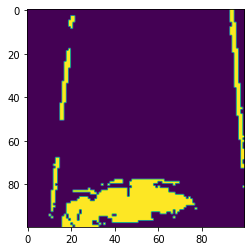

In [69]:
dst_bin = (dst[:,:,0] > 155) & (dst[:,:,1] > 155) & (dst[:,:,2] > 155)
plt.imshow(dst_bin)

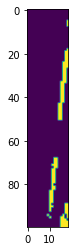

In [70]:
plt.imshow(dst_bin[:,1:20])

In [71]:
# サンプルを使って直線のパラメータa,bを求める
def getParamWithSamples(samples):
    p0 = samples[0]
    p1 = samples[1]
    dp = p1 - p0
    a = dp[1] / dp[0]
    b = p0[1] - a * p0[0]
    return a, b
    
# モデルに当てはめる（y=ax+b）
def applyModel(model, x):
    a = model[0]
    b = model[1]
    return a * x + b

# 誤差を計算する
def getError(model, p):
    x = p[0]
    y = p[1]
    return np.abs(applyModel(model, x) - y)

# よくわからない
def errorGrad(model, data):
    a = model[0]
    b = model[1]
    x = data[:, 0]
    y = data[:, 1]
    ga = (2 * (a * x + b - y) * x).sum()
    gb = (2 * (a * x + b - y)).sum()
    return np.array([ga, gb])

# パイプライン
def ransac(data,
        # parameters for RANSAC
        n = 2, # required sample num to decide parameter
        k = 100, # max loop num
        t = 2.0, # threshold error val for inlier
        d = 800 # requrired inlier sample num to be correnct param
    ):
    
    # 変数を用意
    good_models = []
    good_model_errors = []
    iterations = 0
    
    # loop
    while iterations < k:
        # ランダムに２つデータを取り出す
        sample = data[np.random.choice(len(data), 2, False)]
        
        # 直線のパラメータを算出
        param = getParamWithSamples(sample)
        if ((param[0]==np.inf) or (param[0]==-np.inf)):
            continue
        
        # 許容誤差範囲内にどれだけのデータが入っているか
        inliers = []
        for p in data:
            # 直線モデル算出に使ったデータは外す
            if (p == sample).all(1).any(): continue
                
            # 誤差を計算して許容誤差範囲を超えているか
            if getError(param, p) > t:
                continue
            else:
                # 許容誤差範囲内だったらそのデータを追加
                inliers.append(p)
        
        #  許容誤差範囲内にいくつデータが入ったか、閾値を超えているか
        if len(inliers) > d:
            # 超えていたら平均誤差を計算
            current_error = np.array([getError(param, p) for p in data]).mean()
            # とりあえずリストに追加
            good_models.append(param)
            good_model_errors.append(current_error)
        
        # 一回のループが終了
        iterations += 1
    
    # 指定回数ループが回ったら、誤差最小のモデルを返す
    best_index = np.argmin(good_model_errors)
    return good_models[best_index]

# 最急降下法？
def leastSquare(data):
    # Simulated Annealing
    # https://qiita.com/ShataKurashi/items/c0c6044e97fa9e4a9471
    tau = 100
    bestfit = None
    besterr = float('inf')
    model = np.zeros(2)
    while tau >= 0.0001:
        for _ in range(10):
            grad = errorGrad(model, data)
            grad /= np.linalg.norm(grad)
            grad *= -1
            model += grad * tau
            
        tau *= 0.1
    return model

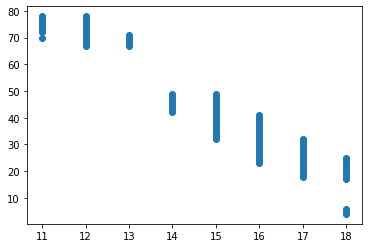

In [72]:
points = np.where(dst_bin[1:80,1:20]==True)

data = []
for i in range(len(points[0])):
    data.append([points[1][i], points[0][i]])
data = np.array(data)

plt.scatter(data[:,0], data[:,1])

In [73]:
a_L, b_L = ransac(data, d=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


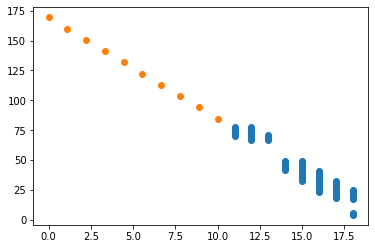

In [74]:
plt.scatter(data[:,0], data[:,1])
x_L = np.linspace(0,10, 10)
plt.scatter(x_L, a_L*x_L+b_L)

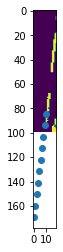

In [75]:
plt.imshow(dst_bin[:,1:20])
plt.scatter(x_L, a_L*x_L+b_L)

In [76]:
points = np.where(dst_bin==True)
points

(array([ 0,  0,  1, ..., 99, 99, 99]), array([93, 94, 93, ..., 30, 31, 32]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


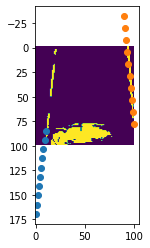

In [77]:
points = np.where(dst_bin==True)

data = []
for i in range(len(points[0])):
    if(points[1][i]>80):
        data.append([points[1][i], points[0][i]])
data = np.array(data)

a_R, b_R = ransac(data, d=10)
x_R = np.linspace(90,100,10)

plt.imshow(dst_bin)
plt.scatter(x_L, a_L*x_L+b_L)
plt.scatter(x_R, a_R*x_R+b_R)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


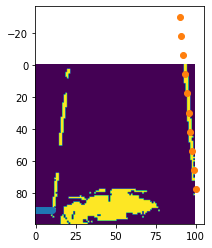

In [78]:
points = np.where(dst_bin==True)

data_R = []
data_L = []
for i in range(len(points[0])):
    if(points[1][i]>80):
        data_R.append([points[1][i], points[0][i]])
    elif(points[1][i]>20):
        data_L.append([points[1][i], points[0][i]])
        
data_R = np.array(data_R)
data_L = np.array(data_L)


a_L, b_L = ransac(data_L, d=10)
x_L = np.linspace(0,10,10)

a_R, b_R = ransac(data_R, d=10)
x_R = np.linspace(90,100,10)

plt.imshow(dst_bin)
plt.scatter(x_L, a_L*x_L+b_L)
plt.scatter(x_R, a_R*x_R+b_R)

In [79]:
L = (100-b_L)/a_L
R = (100-b_R)/a_R

-186.99999999999986
102.05555555555556
-94.52777777777771


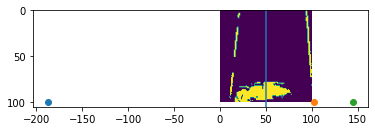

In [80]:
plt.imshow(dst_bin)
plt.scatter(L,100)
plt.scatter(R,100)
plt.scatter((R-L)/2,100)
plt.axvline(100/2)

print(L)
print(R)
print(100/2 - (R-L)/2)

In [81]:
! pip3 install youtube-dl

In [82]:
# ! youtube-dl https://www.youtube.com/watch?v=8RBP2k7dJ4E

In [83]:
file_name = "input.mp4"
cap = cv2.VideoCapture(file_name)
ret, i = cap.read()

In [84]:
print(cap.get(cv2.CAP_PROP_FPS))

29.289369160101444


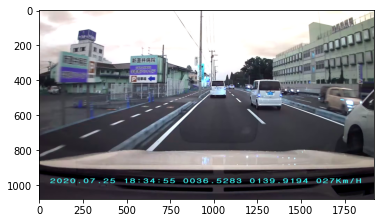

In [85]:
plt.imshow(i)

In [86]:
def show_area(img, pts):
    
    pts2 = np.float32([[100,100],[100,0],[0,0],[0,100]])

    M = cv2.getPerspectiveTransform(pts,pts2)
    dst = cv2.warpPerspective(img,M,(100,100))
    
    plt.subplot(2,1,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    for i in range(4):
        plt.scatter(pts[i][0],pts[i][1])
    plt.subplot(2,1,2)
    plt.imshow(dst)

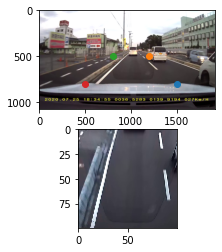

In [87]:
show_area(i, np.float32([[1500, 800],[1200, 500],[800, 500],[500, 800]]))

In [88]:
def calculate_offset(img, pts):
    pts2 = np.float32([[100,100],[100,0],[0,0],[0,100]])

    M = cv2.getPerspectiveTransform(pts,pts2)
    dst = cv2.warpPerspective(img,M,(100,100))
    
    dst_bin = (dst[:,:,0] > 200) & (dst[:,:,1] > 200) & (dst[:,:,2] > 200)
    
    points = np.where(dst_bin==True)

    data_R = []
    data_L = []
    for i in range(len(points[0])):
        if (points[1][i]>60):
            data_R.append([points[1][i], points[0][i]])
        elif (points[1][i]<40):
            data_L.append([points[1][i], points[0][i]])

    data_R = np.array(data_R)
    data_L = np.array(data_L)


    a_L, b_L = ransac(data_L, d=10)
    x_L = np.linspace(0,10,10)

    a_R, b_R = ransac(data_R, d=10)
    x_R = np.linspace(90,100,10)
    
    L = (100-b_L)/a_L
    R = (100-b_R)/a_R    

    plt.imshow(dst_bin, cmap = "gray")
    plt.scatter(L,100)
    plt.scatter(R,100)
    plt.scatter((R-L)/2,100)
    plt.axvline(100/2)
    plt.title(100/2 - (R-L)/2)
        
    return 100/2 - (R-L)/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


CPU times: user 405 ms, sys: 964 µs, total: 406 ms
Wall time: 408 ms


8.106412966878082

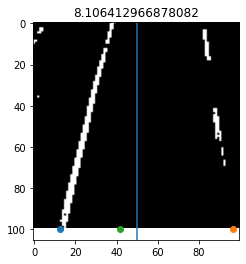

In [89]:
%%time
calculate_offset(i, np.float32([[1500, 800],[1200, 500],[800, 500],[500, 800]]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


CPU times: user 1min 9s, sys: 6.08 s, total: 1min 15s
Wall time: 54.6 s


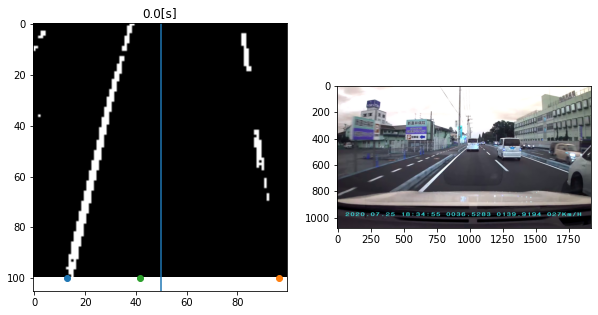

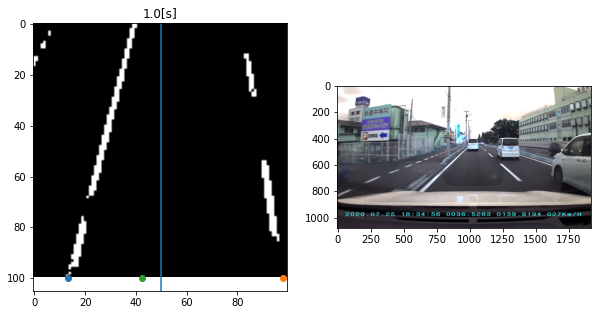

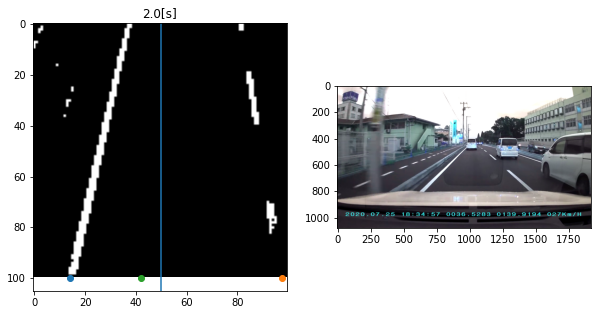

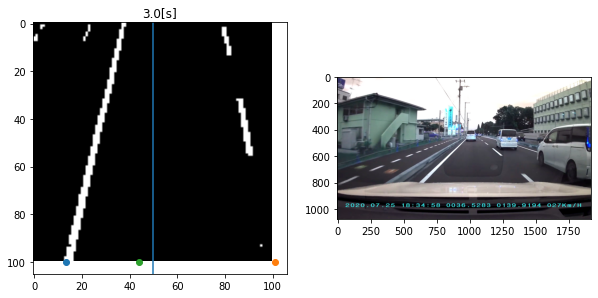

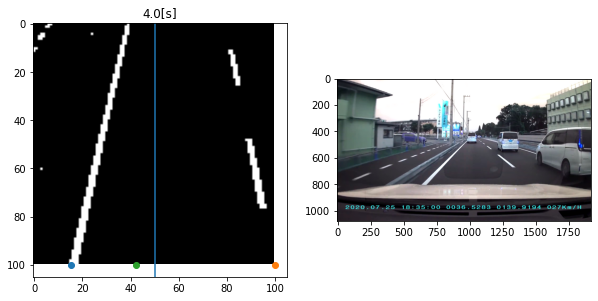

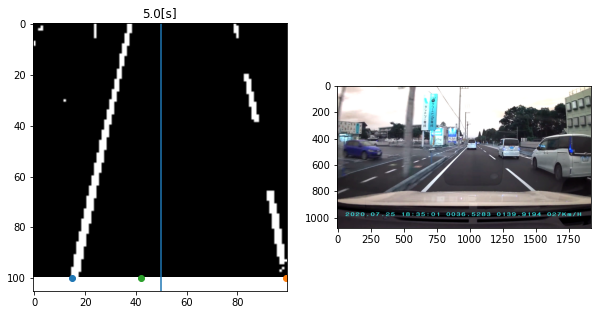

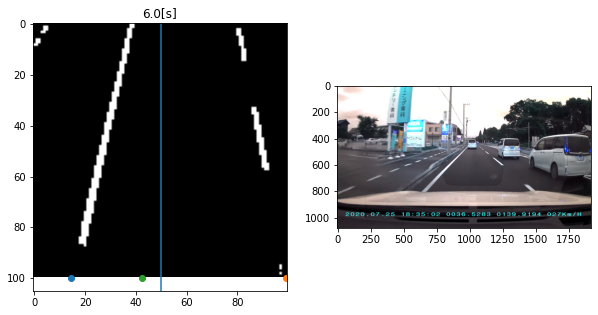

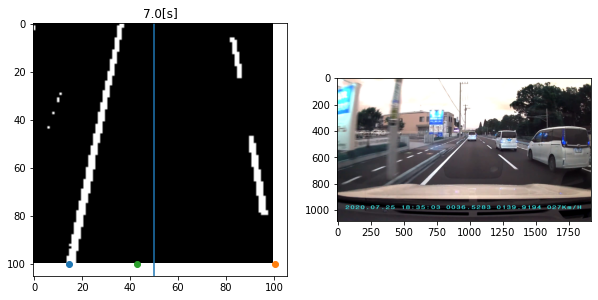

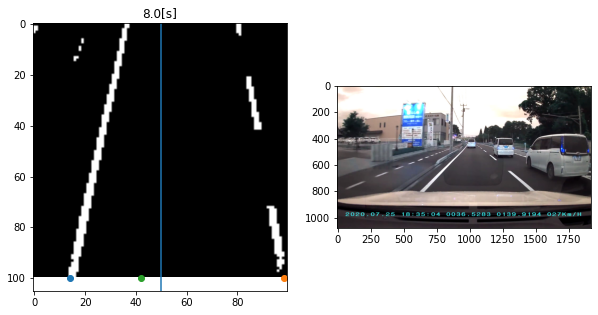

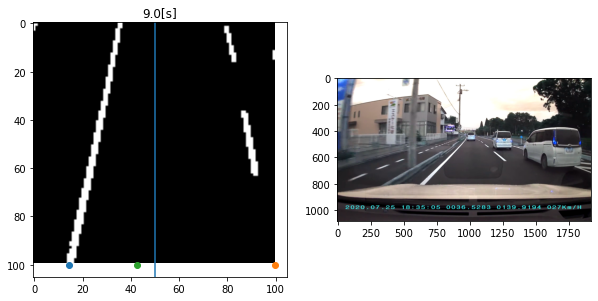

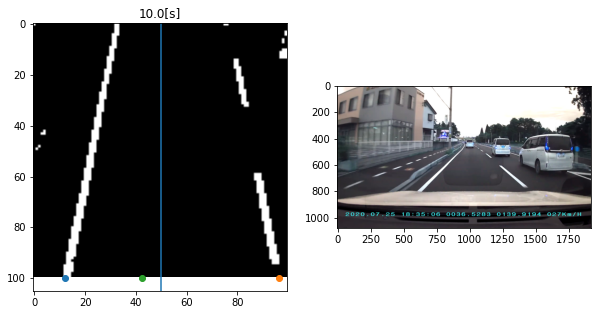

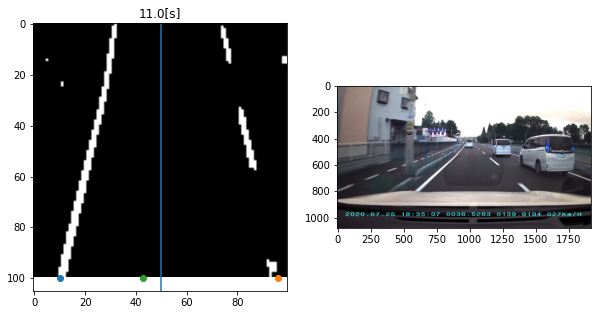

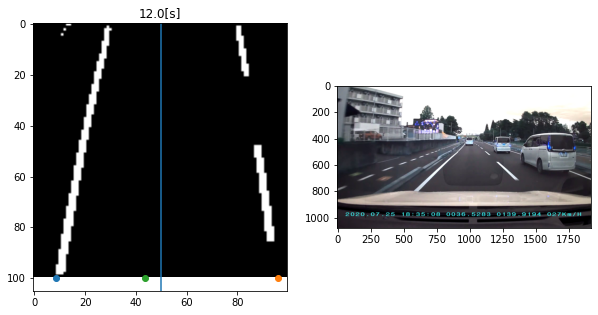

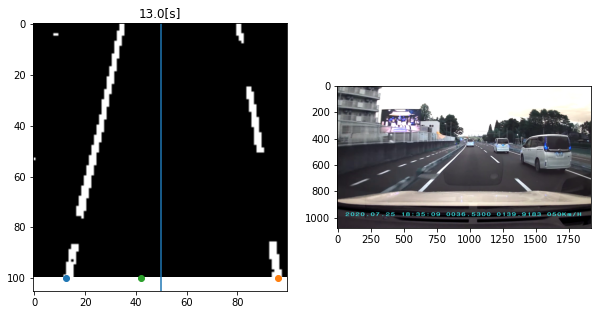

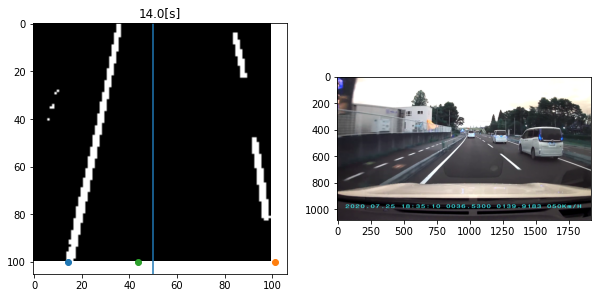

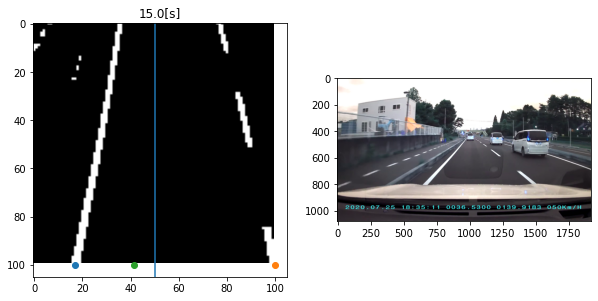

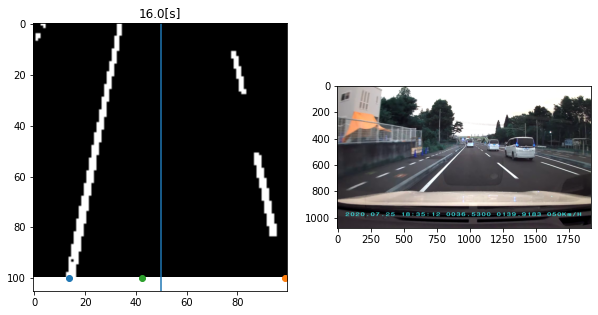

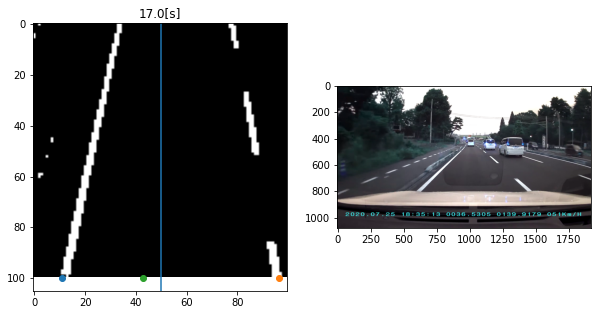

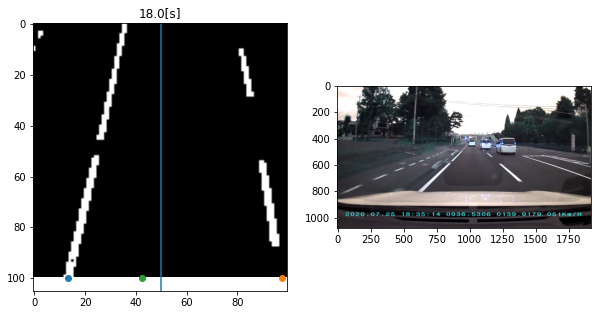

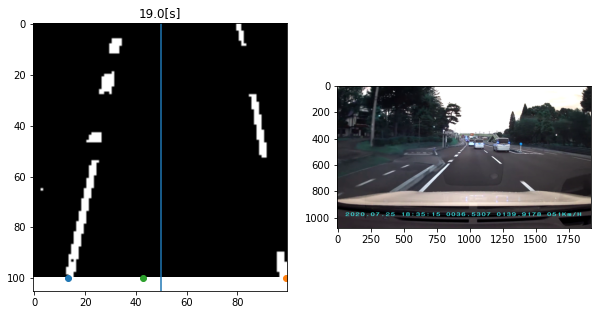

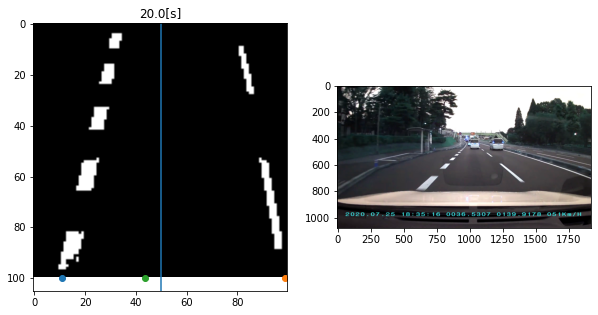

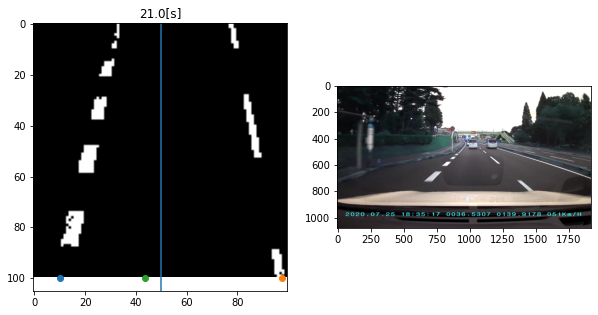

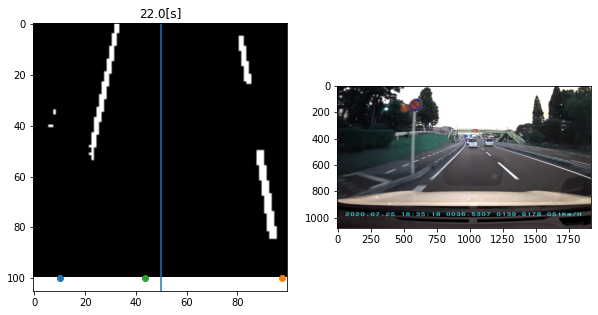

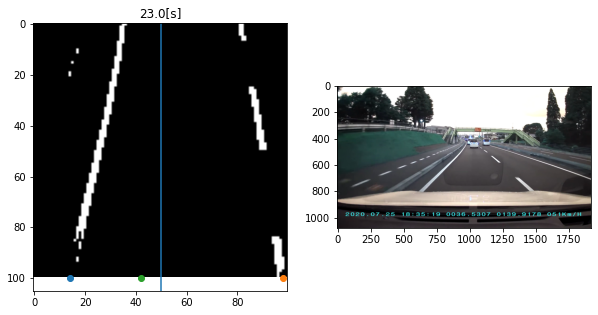

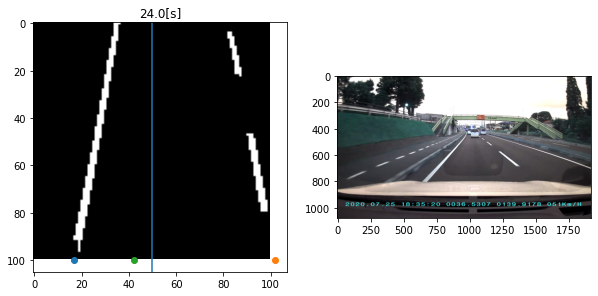

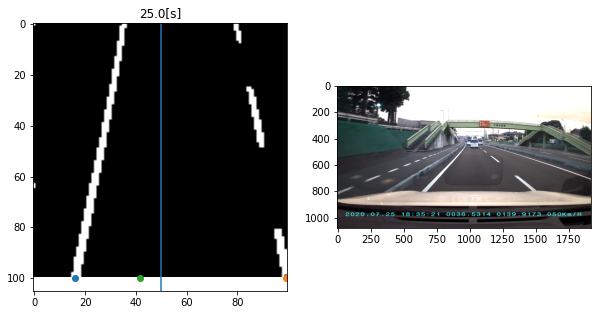

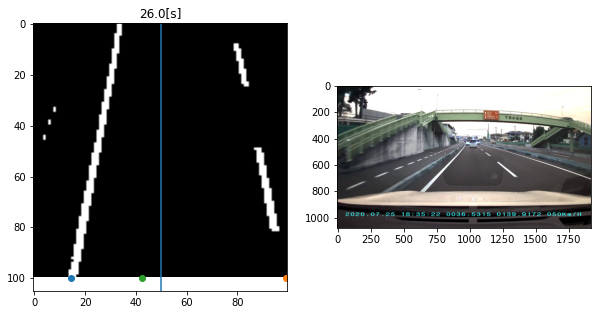

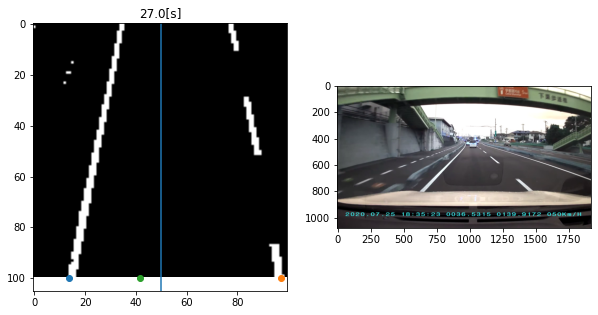

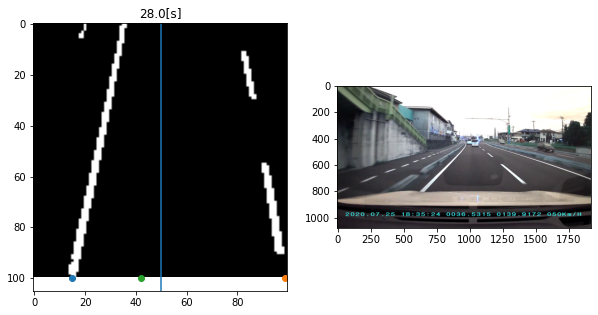

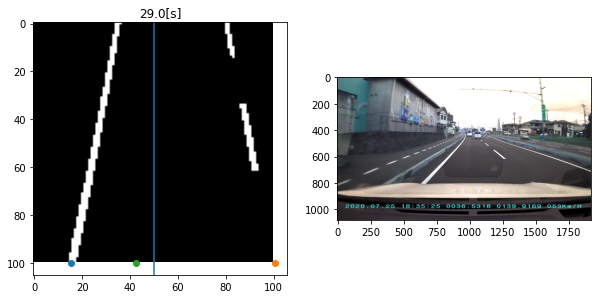

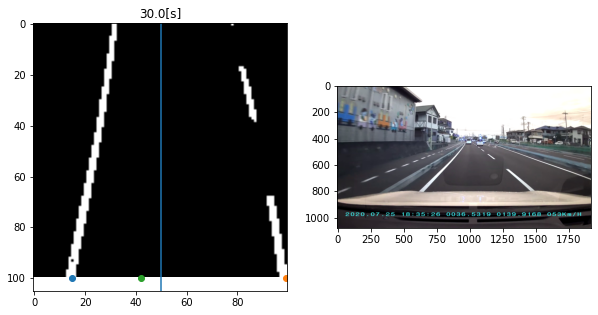

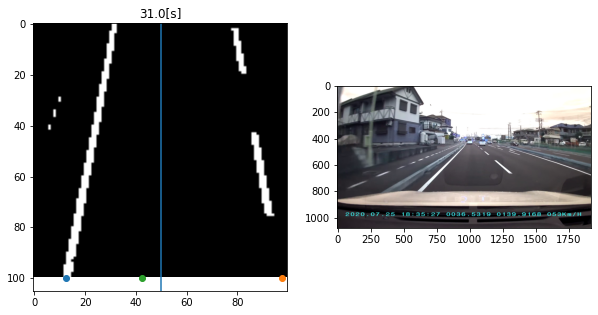

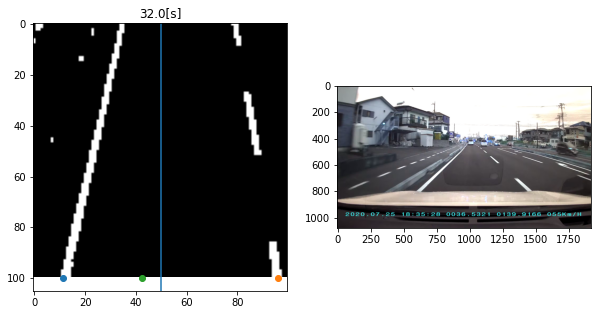

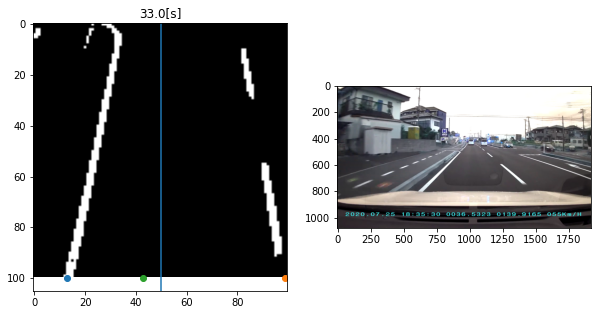

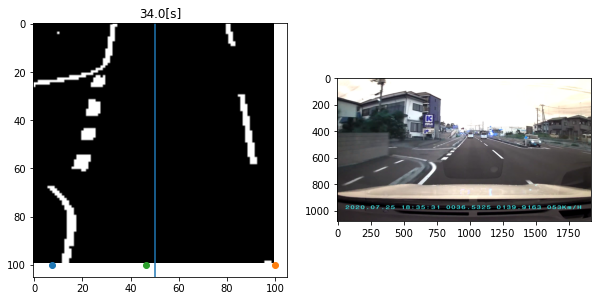

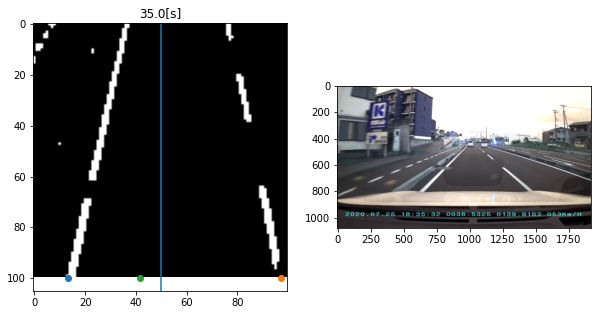

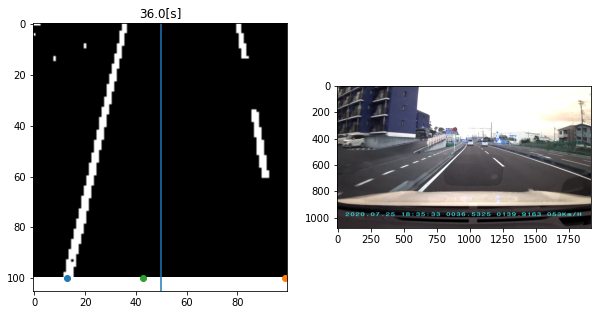

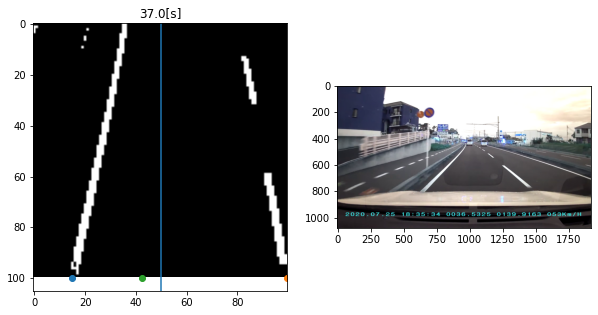

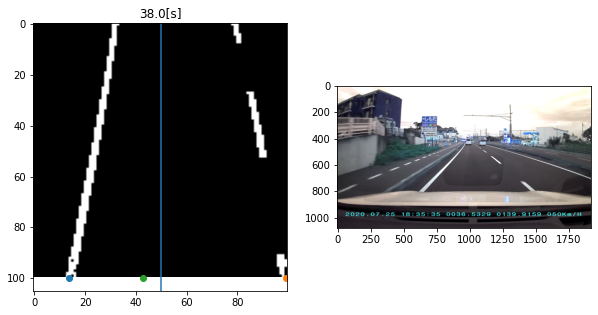

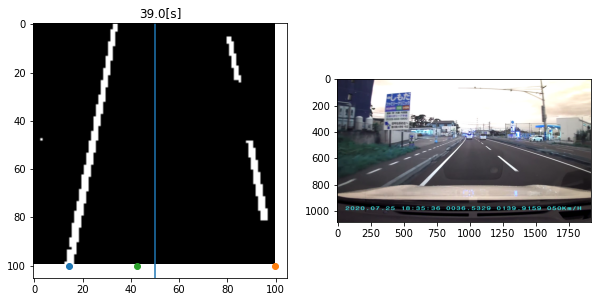

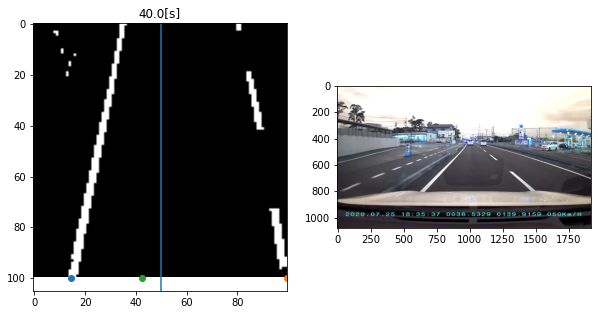

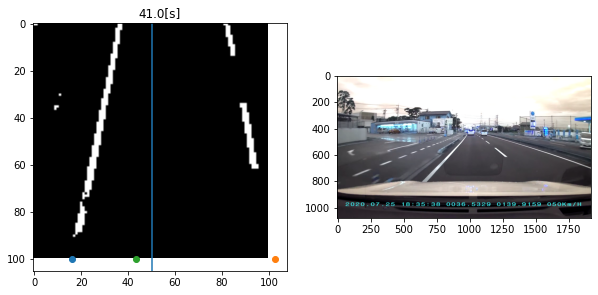

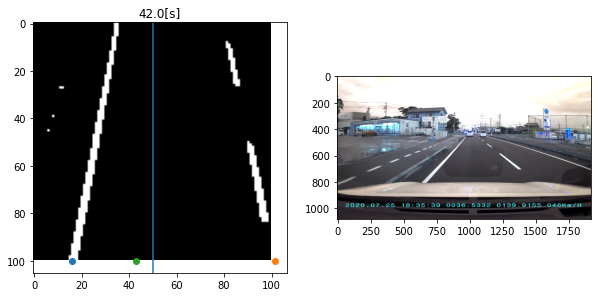

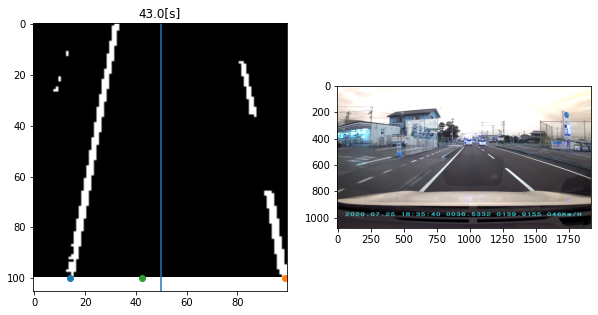

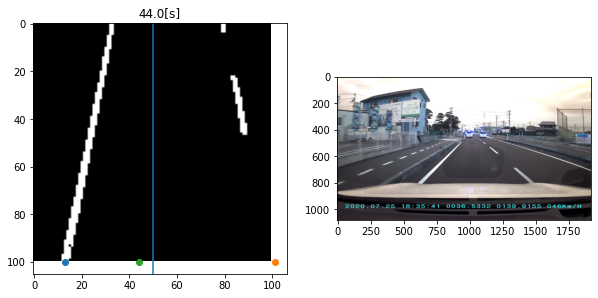

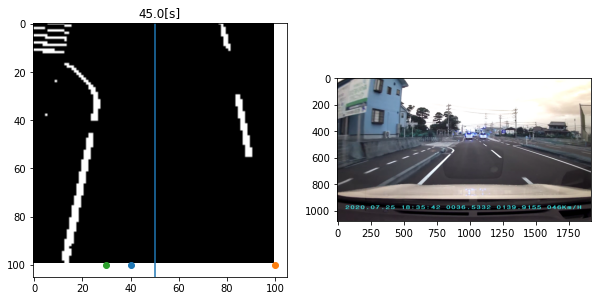

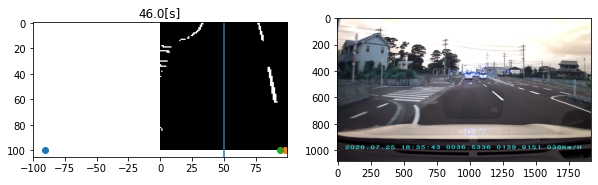

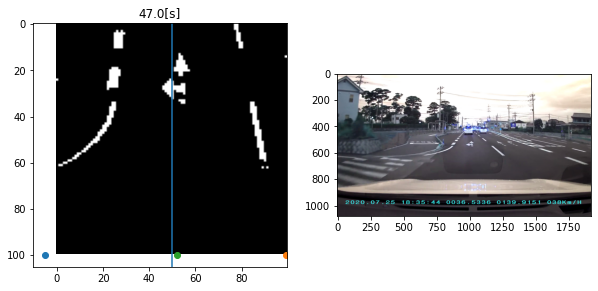

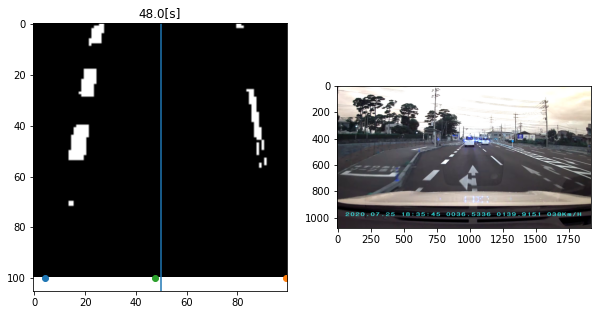

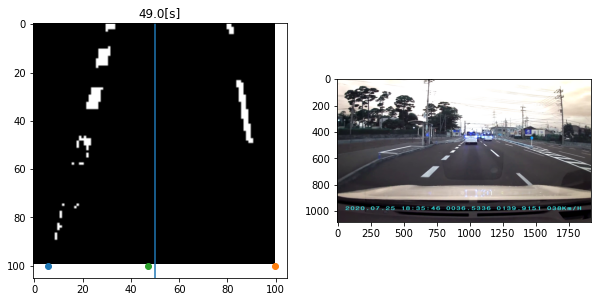

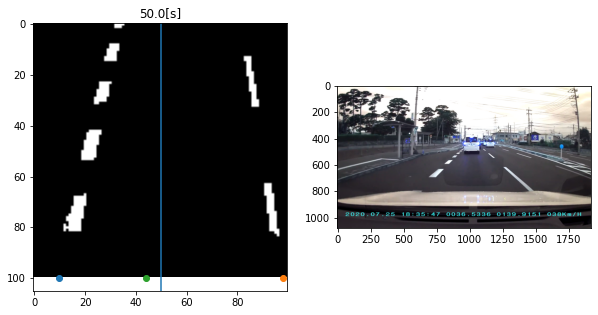

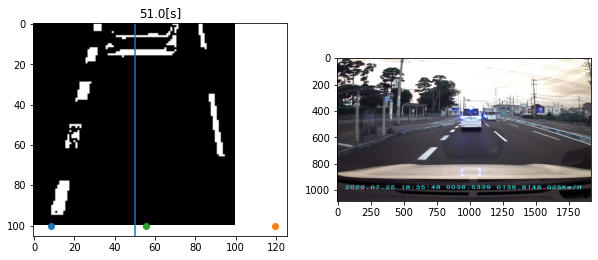

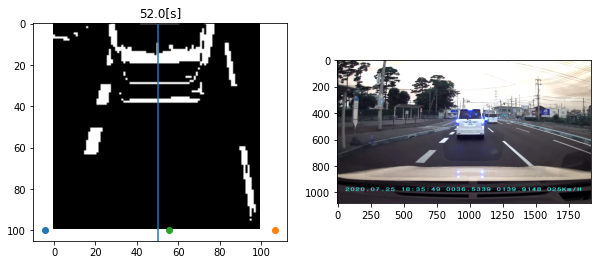

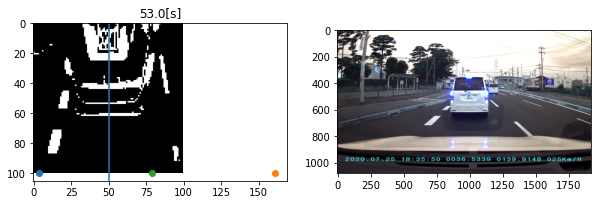

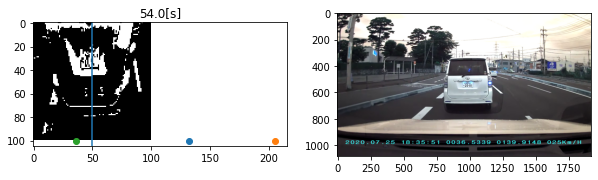

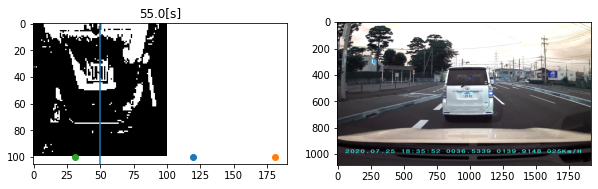

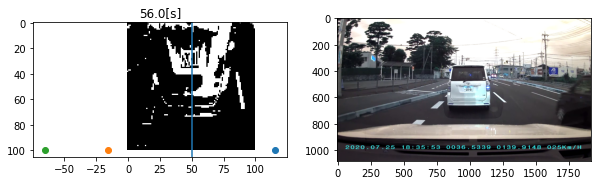

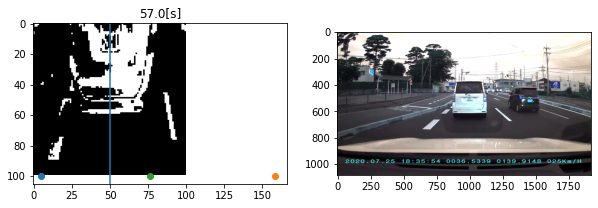

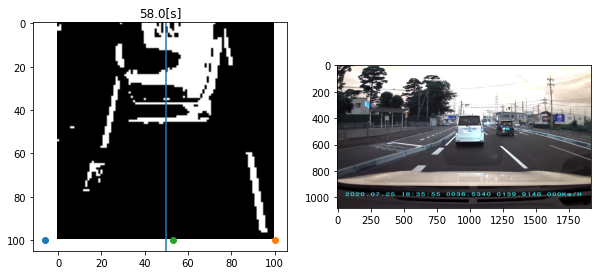

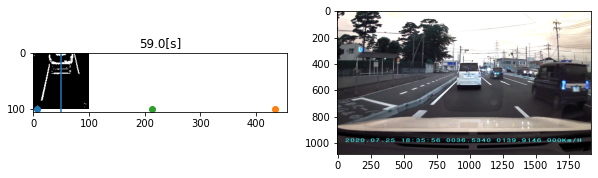

In [90]:
%%time

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) 
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
fps = int(cap.get(cv2.CAP_PROP_FPS))

# fourcc = cv2.VideoWriter_fourcc(*'MP4V')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video  = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

counter = 0
while(cap.isOpened()):
#while(counter<30*20):
  ret, i = cap.read()
  if (counter%30==0):
    if ret:
      plt.figure(figsize=(10,5))
      plt.subplot(1,2,1)
      calculate_offset(i, np.float32([[1500, 800],[1200, 500],[800, 500],[500, 800]]))
      plt.title(str(counter/30)+"[s]")
      plt.subplot(1,2,2)
      plt.imshow(i)
    else:
        break
  counter = counter + 1